## 1. USA.gov Data from Bitly

<p><a href="https://bitly.com/">Bitly</a> is URL shortening service. Back in 2011 they partenered with the US government to provide a feedback of anonymous data gathered from users who shorten links ending with .gov or .mil</p>
<p>
    <img src="https://docrdsfx76ssb.cloudfront.net/static/1599081456/pages/wp-content/uploads/2020/05/illo-mobile-810x480-1.jpg">
    <p> Here we are going to make a simple exploration of this dataset accompanied with visualisations of cases like <em><strong>How many of these users are using windows machines?</strong></em> and <em><strong>From which timezones?</strong></em> etc etc.</p>
    <p>So let's start by importing the related JSON data and see what we can do towards manipulate it properly</p>

In [1]:
import json
import warnings

# Filter out normal warnings/caveats
warnings.filterwarnings('ignore')

# Create path to data and import it
path = './datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]


print('Number of records: ', len(records))
records[0:2]

Number of records:  3560


[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

## 2. Some Timezone proccessing
<p>At first the previous output might look a bit messy but thing we will become more clear as we procceed.</p>
<p> Let's say we are interested in in finding the most often-occuring time zones in the dataset (namely the <code>tz</code> field). One of many ways to achieve this is to extract a list of time zones and compute the frequency of them.</p>
<p>One point of interest is that we printed the full output of the records, one can notice that not all data points contain a <code>tz</code> field so we have to opt out these ones. This is all done in a following list comprehension.</p>

In [2]:
# Create a list from only the entries containing tz field
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

print('The number of entries containg a tz field is:', len(time_zones))
print(time_zones[:10])

The number of entries containg a tz field is: 3440
['America/New_York', 'America/Denver', 'America/New_York', 'America/Sao_Paulo', 'America/New_York', 'America/New_York', 'Europe/Warsaw', '', '', '']


## 3. Understanding Timezone output
<p>Out of the initial 3560 records, 3440 do contain a <code>tz</code> field. Another insight that just came up is that even among the ones that contain a timezone, some a considered as unknown (the ' ' empty string).</p>
<p>Now we will create a dictionary to count and store the number of each timezone. This will be done by using the <code>defaultdict</code> from the <code>collections</code> module so we don't have to explicit hardcode what to do with the default cases and init values. For reusability purposes we will implement this into a function that makes general counting.</p>

In [3]:
from collections import defaultdict

def get_counts(sequence):
    '''Create a general counting function over a user provided sequence'''
    
    # Initialize values to 0
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts


# Count timezones. Print number and percentage of 'America/New_York' tz
counts = get_counts(time_zones)
print('Number of New_York tz appearing: ', counts['America/New_York'])

ny_prc = counts['America/New_York'] / len(time_zones)* 100
print('With a percetange of: {:.2f} %'.format(ny_prc))


Number of New_York tz appearing:  1251
With a percetange of: 36.37 %


## 4. Top 10 timezones
<p>Ok we see that <code>America/New_York</code> timezones occupies a decent 36.37% of the total time zone entries. Nothing less expected from the one the busiest cities in the world!But <em><strong>how about the top 10 timezones?</strong></em> Traditionally this can be achieved with something like <code>[(count, tz) for tz, count in count_dict.items()]</code> or more efficiently with <code>Counter</code> from <code>collections</code>. </p>
<hr>
<p> In contrast to the above mentioned implementations here we are going take a step back and create a dataframe. This could be done ealrier but for demonastration purposes we showed how to do a first naive approach of exploring the json data. Working with dataframes (whenever prossible) is preferred because it is a more systematic way which provide us with further tools for analytics, visualization etc.</p>

In [4]:
import pandas as pd

# Create dataframe. Print its general info
frame = pd.DataFrame(records)
print(frame.info())

# Count unique values, this is in descending order by default. Print the first 10
tz_counts = frame['tz'].value_counts()
print("\nTop 10 of tz:")
print(tz_counts[:10])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

## 5. Visualizing Timezones
<p> We see that runner up for  the"10 most common timezones" is the 'unknown category'. We will now make a visual representation of the previous output, because visualizations is a great tool for <strong>E</strong>xploratory <strong>D</strong>ata <strong>A</strong>nalysis (<strong>EDA</strong>), but first we have to make a clean up of the 'uknown values'</p>
<p>Since the uknown values are not <code>NaN</code> values and they do occupy a decent percentage ("2nd position") of the  data in discussion, we can't just put them aside. Instead we are going to give them a name (something like 'missing') that makes more sense in the context of visualization.</p>

<AxesSubplot:>

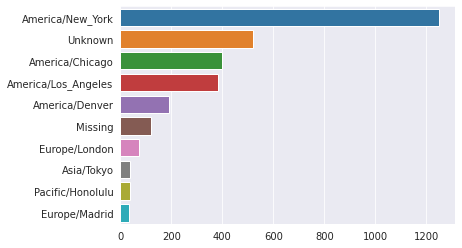

In [5]:
import seaborn as sns

sns.set_style('darkgrid')

# Make a series form timezones. Rename missing values into 'Unknown'
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

# Again extract values, find top10 and plot them
tz_counts = clean_tz.value_counts()
subset = tz_counts[:10]
sns.barplot(x=subset.values, y=subset.index)

## 6. Investigate device usage
<p>So now we have an insightful and easy to understand picture of "where" the users were located at the time when the shortening took place.</p>
    <p>Can we make further exploration? The answer is yes, either in the context of isolating another parameter and make a viz out of it or either by comparing  parameters.Here, we are going both!
<hr>
    <p>Firstly we will make a summary of the user behavior. The <code>a</code> field contains information about browser, device or application used to perform the URL shortening. In our case we can achieve this by simply trying to split off the first token in the string (= browser capability), avoiding the usage of regular expressions. For demonstration simplicity we will assume that a user uses windows if the string <code>'Windows'</code> is in the string being parsed, otherwise is a <code>not Windows</code> case (without caring which specific alternative it is).</p>
    <p>Afterwards, given our previous time zone info/visualization, we will try to decompose the top time zones into Windows and non-Windows user. We will exclude all unknown sources to produce a clean result.</p>

In [6]:
import numpy as np

# Extract the apps into a series. Then print 8 most used apps
results = pd.Series([specs.split()[0] for specs in frame['a'].dropna()])
print(results.value_counts()[:5])

# Create a "null free" frame.
cframe = frame[frame['a'].notnull()]

# Find if windows operating system (os) were used or not and create columnb
os = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe['os'] = os

# Group OS data by time zone
by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack().fillna(0)

# Sort and print top 10 overall time zonessrt_counts['total'] = agg_counts.sum(1).nlargest(10)
agg_counts['total'] = agg_counts.sum(1)
srt_counts = agg_counts.sort_values(['total'])
top10 = srt_counts.iloc[-10:, 0:2]
top10


Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64


os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


## 7. Vizualizing time_zone-os data
<p>Overall we can notice a prevalence of Windows usage in almost all related timezones. This can be understood more easily by vizualing the previous output so we will make a stacked plot so we can simultaneously see both attributes. </p>
<p>Though the <code>seaborn</code> library does not contain a direct stacked bar plot function, this can still be easily done. All we have to do is create a barplot in the same way as before but this time we have to set <code>hue = 'os'</code> in the parameters, so our two attributes will have a different color.</p>

<AxesSubplot:xlabel='total', ylabel='tz'>

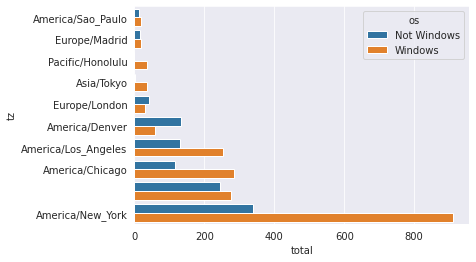

In [7]:
# Stack() so both atrributes can be provided to barplot as indexes
top10 = top10.stack()
top10.name = 'total'
top10 = top10.reset_index()

# Plot. 'hue' differantiates 'tz' and 'os' by color
sns.barplot(y='tz', x='total', hue='os', data=top10)

## 8. Normalize data
<p>Though the above plot gives a sense that verifies the aforementioned "Windows  usage prevalence", we still can't see the percentage of population, for each time zone, upon which this statement holds true.</p>
<p>The "cure" for this is to normalize  the data to sum to 1 and vizualize the result again. The procedure for this goes as follows:</p>
<ul>
<li>First we group the data by <em>timezone</em> so we can sum each group's values, which is obtained by using the panda's <code>tranform</code> method.</li>
<li>Then we divide each group's value, contained in the the <code>total</code> column, by the group's total sum that we computed in the previous step. This is the normalized total</li>
<li>Lastly we provide our normalized total as input for the x axis which is plotted against <code>tz</code> and <code>os</code>.</li>

<AxesSubplot:xlabel='total', ylabel='tz'>

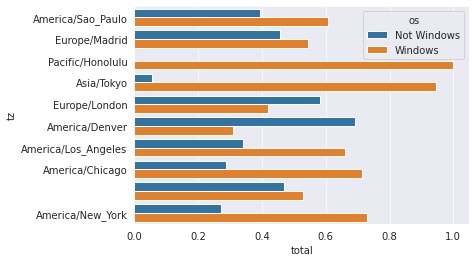

In [8]:

tz_grp = top10.groupby('tz')
normed_total = top10.total / tz_grp.total.transform('sum')

sns.barplot(x=normed_total, y='tz', hue='os', data=top10)

## 9. Conculsion
<p>Now we have more insight about the "Windows prevalence". We observe that around 76% of the users with 'New_York' time zone used Windows but this is nothing compared to the devastating percentages in Honolulu and Tokyo. On the other hand London and Denver exhibited some "anti-Windows" behaviour, so to speak.</p>
<hr>
<p>To recap:</p>
<ul>
<li>We imported our data and we kept the data points that contained a time zone entry.</li>
<li>Out of these points we extracted the technology source, excluding missing entries, and plotted them in relation to time zones</li>
    <li>Lastly we tranformed the result so we can have a better picture at a "percentage level".</li>
</ul>
<img src="https://miro.medium.com/max/830/1*Pdw7h5X6vQQNVopIzHBG6A.jpeg" width="500">